In [1]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of testing examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of testing examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 2 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [6]:
X_train.shape

(60000, 784)

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 


# Defining a function for model with dropout as well as batch normalisation

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras

from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization
from keras import initializers as K

def nn(n_layers,d):
  model = Sequential()

  model.add(Dense(n_layers[0], activation='relu', input_shape=(input_dim,), kernel_initializer=K.he_normal(seed=None)))
  model.add(BatchNormalization())
  model.add(Dropout(d[0]))

  for i in range(len(n_layers)-1):
    model.add(Dense(n_layers[i+1], activation='relu',kernel_initializer=K.he_normal(seed=None)) )
    model.add(BatchNormalization())
    model.add(Dropout(d[i+1]))

  model.add(Dense(output_dim, activation='softmax'))


  model.summary()


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


  %matplotlib inline
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

   #dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

## Architecture with 2 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_128 (Dense)            (None, 468)               367380    
_________________________________________________________________
batch_normalization_85 (Batc (None, 468)               1872      
_________________________________________________________________
dropout_65 (Dropout)         (None, 468)               0         
_________________________________________________________________
dense_129 (Dense)            (None, 92)                43148     
_________________________________________________________________
batch_normalization_86 (Batc (None, 92)                368       
_________________________________________________________________
dropout_66 (Dropout)         (None, 92)                0         
_________________________________________________________________
dense_130 (Dense)            (None, 10)                930       
Total para

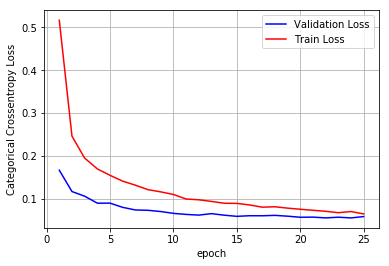

In [78]:
n_layers = [468,92]
d = [0.6,0.5]
nb_epoch = 25
nn(n_layers,d)

## Architecture with 3 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_131 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_87 (Batc (None, 512)               2048      
_________________________________________________________________
dropout_67 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_132 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_88 (Batc (None, 256)               1024      
_________________________________________________________________
dropout_68 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_133 (Dense)            (None, 128)               32896     
__________

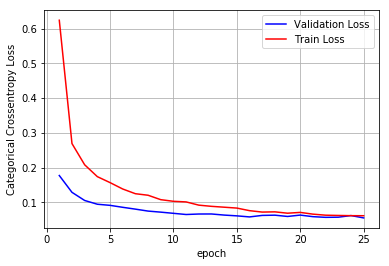

In [79]:
n_layers = [512,256,128]
d = [0.5,0.6,0.5]
nb_epoch = 25
nn(n_layers,d)

## Architecture with 4 hidden layers( for experimentation)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 600)               471000    
_________________________________________________________________
batch_normalization_44 (Batc (None, 600)               2400      
_________________________________________________________________
dropout_44 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 460)               276460    
_________________________________________________________________
batch_normalization_45 (Batc (None, 460)               1840      
_________________________________________________________________
dropout_45 (Dropout)         (None, 460)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 290)               133690    
__________

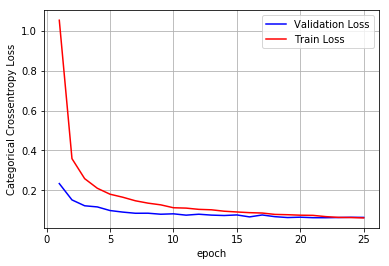

In [56]:
#Using 4 hidden layers for experimentation
n_layers = [600,460,290,112]
d = [0.4,0.7,0.5,0.7]
nb_epoch = 25
nn(n_layers,d)

## Architecture with 5 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 650)               510250    
_________________________________________________________________
batch_normalization_58 (Batc (None, 650)               2600      
_________________________________________________________________
dropout_57 (Dropout)         (None, 650)               0         
_________________________________________________________________
dense_73 (Dense)             (None, 520)               338520    
_________________________________________________________________
batch_normalization_59 (Batc (None, 520)               2080      
_________________________________________________________________
dropout_58 (Dropout)         (None, 520)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 410)               213610    
__________

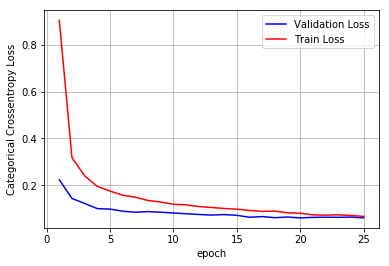

In [59]:
n_layers = [650,520,410,290,125]
d = [0.5,0.6,0.5,0.5,0.5]
nb_epoch = 25
nn(n_layers,d)

# Defining a function for model with only batch normalisation and no dropout.

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras


def nn1(n_layers,bn):
  model = Sequential()
  model.add(Dense(n_layers[0], activation='relu', input_shape=(input_dim,), kernel_initializer=K.he_normal(seed=None)))
  if(bn==1):
    model.add(BatchNormalization())
    for i in range(len(n_layers)-1):
      model.add(Dense(n_layers[i+1], activation='relu',kernel_initializer=K.he_normal(seed=None)) )
      model.add(BatchNormalization())
  else:
    for i in range(len(n_layers)-1):
      model.add(Dense(n_layers[i+1], activation='relu',kernel_initializer=K.he_normal(seed=None)) )
    

  model.add(Dense(output_dim, activation='softmax'))


  model.summary()


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


  %matplotlib inline
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

   #dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

### Architecture with 2 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_102 (Dense)            (None, 468)               367380    
_________________________________________________________________
batch_normalization_75 (Batc (None, 468)               1872      
_________________________________________________________________
dense_103 (Dense)            (None, 92)                43148     
_________________________________________________________________
batch_normalization_76 (Batc (None, 92)                368       
_________________________________________________________________
dense_104 (Dense)            (None, 10)                930       
Total params: 413,698
Trainable params: 412,578
Non-trainable params: 1,120
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 179us/step - loss: 0

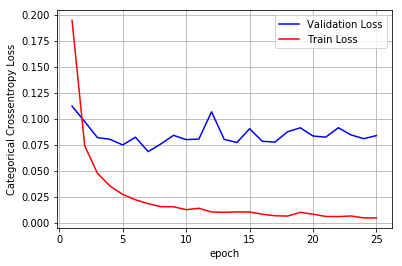

In [70]:
n_layers = [468,92]
bn = 1
nb_epoch = 25
nn1(n_layers,bn)

## Architecture with 3 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_105 (Dense)            (None, 512)               401920    
_________________________________________________________________
batch_normalization_77 (Batc (None, 512)               2048      
_________________________________________________________________
dense_106 (Dense)            (None, 256)               131328    
_________________________________________________________________
batch_normalization_78 (Batc (None, 256)               1024      
_________________________________________________________________
dense_107 (Dense)            (None, 128)               32896     
_________________________________________________________________
batch_normalization_79 (Batc (None, 128)               512       
_________________________________________________________________
dense_108 (Dense)            (None, 10)                1290      
Total para

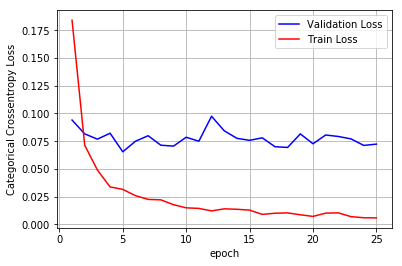

In [71]:
n_layers = [512,256,128]
bn=1
nb_epoch = 25
nn1(n_layers,bn)

## Architecture with 5 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_109 (Dense)            (None, 650)               510250    
_________________________________________________________________
batch_normalization_80 (Batc (None, 650)               2600      
_________________________________________________________________
dense_110 (Dense)            (None, 520)               338520    
_________________________________________________________________
batch_normalization_81 (Batc (None, 520)               2080      
_________________________________________________________________
dense_111 (Dense)            (None, 410)               213610    
_________________________________________________________________
batch_normalization_82 (Batc (None, 410)               1640      
_________________________________________________________________
dense_112 (Dense)            (None, 290)               119190    
__________

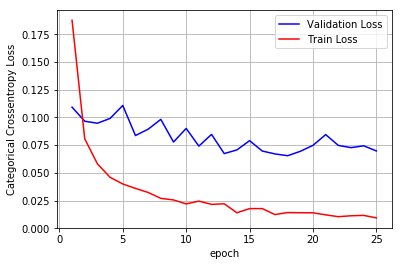

In [72]:
n_layers = [650,520,410,290,125]
bn=1
nb_epoch = 25
nn1(n_layers,bn)

# Defining a function for model with no dropout and no batch normalisation. 

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras


def nn2(n_layers):
  model = Sequential()
  model.add(Dense(n_layers[0], activation='relu', input_shape=(input_dim,), kernel_initializer=K.he_normal(seed=None)))
  for i in range(len(n_layers)-1):
      model.add(Dense(n_layers[i+1], activation='relu',kernel_initializer=K.he_normal(seed=None)) )
    

  model.add(Dense(output_dim, activation='softmax'))


  model.summary()


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


  %matplotlib inline
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

   #dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

### Architecture with 2 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_115 (Dense)            (None, 468)               367380    
_________________________________________________________________
dense_116 (Dense)            (None, 92)                43148     
_________________________________________________________________
dense_117 (Dense)            (None, 10)                930       
Total params: 411,458
Trainable params: 411,458
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 10s 170us/step - loss: 0.2425 - acc: 0.9295 - val_loss: 0.1191 - val_acc: 0.9623
Epoch 2/25
60000/60000 [==============================] - 3s 42us/step - loss: 0.0907 - acc: 0.9724 - val_loss: 0.0864 - val_acc: 0.9715
Epoch 3/25
60000/60000 [==============================] - 3s 42us/step - l

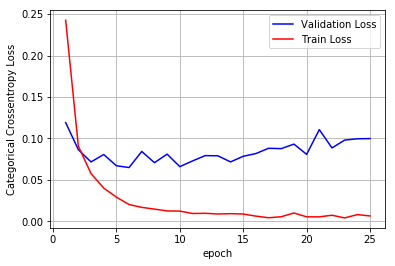

In [75]:
n_layers = [468,92]
nb_epoch = 25
nn2(n_layers)

## Architecture with 3 hidden layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_118 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_119 (Dense)            (None, 256)               131328    
_________________________________________________________________
dense_120 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_121 (Dense)            (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 11s 180us/step - loss: 0.2199 - acc: 0.9339 - val_loss: 0.1075 - val_acc: 0.9663
Epoch 2/25
60000/60000 [==============================] - 3s 46us/step - loss: 

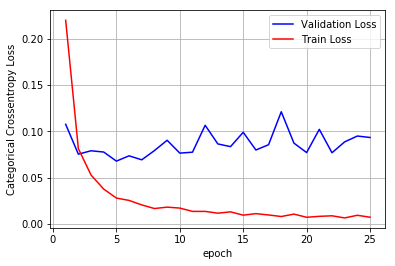

In [76]:
n_layers = [512,256,128]
nb_epoch = 25
nn2(n_layers)

## Architecture with 5 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_122 (Dense)            (None, 650)               510250    
_________________________________________________________________
dense_123 (Dense)            (None, 520)               338520    
_________________________________________________________________
dense_124 (Dense)            (None, 410)               213610    
_________________________________________________________________
dense_125 (Dense)            (None, 290)               119190    
_________________________________________________________________
dense_126 (Dense)            (None, 125)               36375     
_________________________________________________________________
dense_127 (Dense)            (None, 10)                1260      
Total params: 1,219,205
Trainable params: 1,219,205
Non-trainable params: 0
_________________________________________________________________


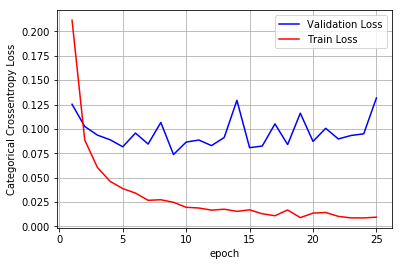

In [77]:
n_layers = [650,520,410,290,125]
nb_epoch = 25
nn2(n_layers)

# Defining a function for model with dropout and no batch normalisation. 

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras


def nn3(n_layers,d):
  model = Sequential()

  model.add(Dense(n_layers[0], activation='relu', input_shape=(input_dim,), kernel_initializer=K.he_normal(seed=None)))
  model.add(Dropout(d[0]))

  for i in range(len(n_layers)-1):
    model.add(Dense(n_layers[i+1], activation='relu',kernel_initializer=K.he_normal(seed=None)) )
    model.add(Dropout(d[i+1]))

  model.add(Dense(output_dim, activation='softmax'))


  model.summary()


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


  %matplotlib inline
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

   #dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

# Architecture with 3 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_135 (Dense)            (None, 512)               401920    
_________________________________________________________________
dropout_70 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_136 (Dense)            (None, 256)               131328    
_________________________________________________________________
dropout_71 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_137 (Dense)            (None, 128)               32896     
_________________________________________________________________
dropout_72 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_138 (Dense)            (None, 10)                1290      
Total para

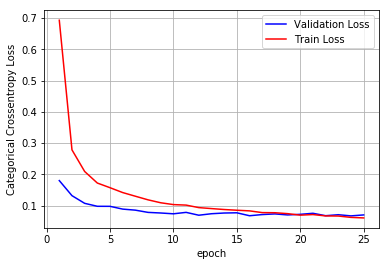

In [81]:
n_layers = [512,256,128]
d = [0.5,0.6,0.5]
nb_epoch = 25
nn3(n_layers,d)

# Architecture with 2 hidden layers.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_139 (Dense)            (None, 468)               367380    
_________________________________________________________________
dropout_73 (Dropout)         (None, 468)               0         
_________________________________________________________________
dense_140 (Dense)            (None, 92)                43148     
_________________________________________________________________
dropout_74 (Dropout)         (None, 92)                0         
_________________________________________________________________
dense_141 (Dense)            (None, 10)                930       
Total params: 411,458
Trainable params: 411,458
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 12s 204us/step - loss: 0.546

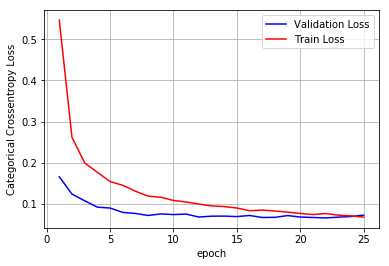

In [82]:
n_layers = [468,92]
d = [0.6,0.5]
nb_epoch = 25
nn3(n_layers,d)

# Architecture with 5 hidden layers

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_142 (Dense)            (None, 650)               510250    
_________________________________________________________________
dropout_75 (Dropout)         (None, 650)               0         
_________________________________________________________________
dense_143 (Dense)            (None, 520)               338520    
_________________________________________________________________
dropout_76 (Dropout)         (None, 520)               0         
_________________________________________________________________
dense_144 (Dense)            (None, 410)               213610    
_________________________________________________________________
dropout_77 (Dropout)         (None, 410)               0         
_________________________________________________________________
dense_145 (Dense)            (None, 290)               119190    
__________

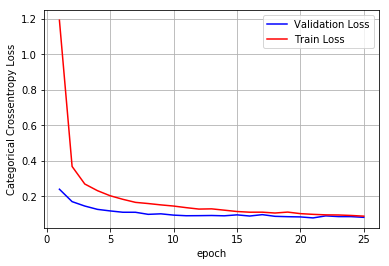

In [83]:
n_layers = [650,520,410,290,125]
d = [0.5,0.6,0.5,0.5,0.5]
nb_epoch = 25
nn3(n_layers,d)

# Experimenting with conditional batch normalisation and dropout with 3 hidden layers.

In [0]:
# https://stackoverflow.com/questions/34716454/where-do-i-call-the-batchnormalization-function-in-keras
def expt():
  model = Sequential()
  model.add(Dense(584, activation='relu', input_shape=(input_dim,), kernel_initializer=K.he_normal(seed=None)))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(320, activation='relu',kernel_initializer=K.he_normal(seed=None)) )
  model.add(BatchNormalization())
  model.add(Dense(125, activation='relu',kernel_initializer=K.he_normal(seed=None)) )
  model.add(Dropout(0.5))
  

  model.add(Dense(output_dim, activation='softmax'))


  model.summary()


  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

  history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))


  %matplotlib inline
  score = model.evaluate(X_test, Y_test, verbose=0) 
  print('Test score:', score[0]) 
  print('Test accuracy:', score[1])

  fig,ax = plt.subplots(1,1)
  ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

  # list of epoch numbers
  x = list(range(1,nb_epoch+1))

   #dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
  # history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

  # we will get val_loss and val_acc only when you pass the paramter validation_data
  # val_loss : validation loss
  # val_acc : validation accuracy

  # loss : training loss
  # acc : train accuracy
  # for each key in histrory.histrory we will have a list of length equal to number of epochs
  vy = history.history['val_loss']
  ty = history.history['loss']
  plt_dynamic(x, vy, ty, ax)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_148 (Dense)            (None, 584)               458440    
_________________________________________________________________
batch_normalization_90 (Batc (None, 584)               2336      
_________________________________________________________________
dropout_80 (Dropout)         (None, 584)               0         
_________________________________________________________________
dense_149 (Dense)            (None, 320)               187200    
_________________________________________________________________
batch_normalization_91 (Batc (None, 320)               1280      
_________________________________________________________________
dense_150 (Dense)            (None, 125)               40125     
_________________________________________________________________
dropout_81 (Dropout)         (None, 125)               0         
__________

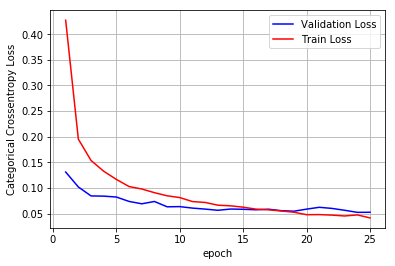

In [87]:
expt()

# Conclusions

In [90]:
from prettytable import PrettyTable
print("===================================================================")
print(" FOR DROPOUT+BATCH NORMALISATION")
x = PrettyTable()
x.field_names = ["No. of hidden layers", "Train Loss", " Val Loss", "Val AUC"]
x.add_row([2, 0.0645, 0.0584, 0.9828])
x.add_row([3, 0.0612, 0.0549, 0.9850])
x.add_row([4, 0.0612, 0.0638, 0.9847])
x.add_row([5, 0.0669, 0.0607, 0.9846])
print(x)
print("====================================================================")
print("====================================================================")
print(" FOR ONLY BATCH NORMALISATION and NO DROPOUT")
x = PrettyTable()
x.field_names = ["No. of hidden layers", "Train Loss", " Val Loss", "Val AUC"]
x.add_row([2, 0.0050, 0.0840, 0.9808])
x.add_row([3, 0.0058, 0.0723, 0.9833])
x.add_row([5, 0.0093, 0.0698, 0.9840])
print(x)

print("====================================================================")
print("====================================================================")
print(" FOR NO DROPOUT AND NO BATCH NORMALISATION")
x = PrettyTable()
x.field_names = ["No. of hidden layers", "Train Loss", " Val Loss", "Val AUC"]
x.add_row([2, 0.0065, 0.0998, 0.9807])
x.add_row([3, 0.0072, 0.0933, 0.9814])
x.add_row([5, 0.0095, 0.1317, 0.9788])
print(x)

print("====================================================================")
print("====================================================================")
print(" FOR DROPOUT ONLY AND NO BATCH NORMALISATION")
x = PrettyTable()
x.field_names = ["No. of hidden layers", "Train Loss", " Val Loss", "Val AUC"]
x.add_row([2, 0.0681, 0.0729, 0.9823])
x.add_row([3, 0.0605, 0.0701, 0.9826])
x.add_row([5, 0.0877, 0.0810, 0.9819])
print(x)

print("====================================================================")
print("====================================================================")
print("EXPERIMENTAL _ DROPOUT-NORMALISATION-DROPOUT")
x = PrettyTable()
x.field_names = ["No. of hidden layers", "Train Loss", " Val Loss", "Val AUC"]
x.add_row([3, 0.0550, 0.0556, 0.9845])
print(x)

 FOR DROPOUT+BATCH NORMALISATION
+----------------------+------------+-----------+---------+
| No. of hidden layers | Train Loss |  Val Loss | Val AUC |
+----------------------+------------+-----------+---------+
|          2           |   0.0645   |   0.0584  |  0.9828 |
|          3           |   0.0612   |   0.0549  |  0.985  |
|          4           |   0.0612   |   0.0638  |  0.9847 |
|          5           |   0.0669   |   0.0607  |  0.9846 |
+----------------------+------------+-----------+---------+
 FOR ONLY BATCH NORMALISATION and NO DROPOUT
+----------------------+------------+-----------+---------+
| No. of hidden layers | Train Loss |  Val Loss | Val AUC |
+----------------------+------------+-----------+---------+
|          2           |   0.005    |   0.084   |  0.9808 |
|          3           |   0.0058   |   0.0723  |  0.9833 |
|          5           |   0.0093   |   0.0698  |  0.984  |
+----------------------+------------+-----------+---------+
 FOR NO DROPOUT AND NO

### Conclusions

1) Observing all the pretty tables, we conclude that
( Dropout+Batch Normalisation) > only Dropout > only batch normalisation > no dropout or normalisation

2) As can be observed form the graphs , overfitting occurs, wherever there is no dropout or batch normalisation.

3) The best model was found from the experimental model.(Considering upto epoch 18.) It was done as :
For this , drop out was applied on first hidden layer.Then, batch normalisation on second hidden layer. Then again, dropout on third hidden layer. This way,instead of applying both of them on all layers,  time and cost of computing was saved. The result was also good. The diff between train loss and val loss was 0.0006 at epoch 18(Least of all models).Other models took till epoch near to 25 to converge.

4) We can infer that dropout and batch normalisation helps a lot in deep learning models especially in avoiding overfitting.